# Preparation

### Import libraries

In [1]:
import pandas as pd              # For data manipulation and analysis
import numpy as np               # For numerical computing
from datetime import datetime
from scipy.stats import trim_mean, kurtosis, skew, boxcox, yeojohnson      # For statistical analysis
from math import sqrt
import matplotlib                # For plotting and visualization
import matplotlib.pyplot as plt  
from pandas.plotting import parallel_coordinates
import seaborn as sns            # For statistical data visualization
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold,cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)
from sklearn.model_selection import StratifiedKFold, cross_val_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import optuna

### Import dataset

In [3]:
df_train = pd.read_csv('/kaggle/input/dataset/train.csv', index_col = 0)
df_test = pd.read_csv('/kaggle/input/dataset/test.csv')

In [4]:
df_train.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
id,,,,,,,,
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [5]:
df_test.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


# EDA

In [6]:
df_train.isnull().sum()

Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [7]:
df_test.isnull().sum()

id                             0
Time_spent_Alone             425
Stage_fear                   598
Social_event_attendance      397
Going_outside                466
Drained_after_socializing    432
Friends_circle_size          350
Post_frequency               408
dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18524 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           17334 non-null  float64
 1   Stage_fear                 16631 non-null  object 
 2   Social_event_attendance    17344 non-null  float64
 3   Going_outside              17058 non-null  float64
 4   Drained_after_socializing  17375 non-null  object 
 5   Friends_circle_size        17470 non-null  float64
 6   Post_frequency             17260 non-null  float64
 7   Personality                18524 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.3+ MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6175 non-null   int64  
 1   Time_spent_Alone           5750 non-null   float64
 2   Stage_fear                 5577 non-null   object 
 3   Social_event_attendance    5778 non-null   float64
 4   Going_outside              5709 non-null   float64
 5   Drained_after_socializing  5743 non-null   object 
 6   Friends_circle_size        5825 non-null   float64
 7   Post_frequency             5767 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 386.1+ KB


#### **Observations**

* Train dataset has 18524 rows x 9 columns. This includes 7 predictors, and Personality as the target of the model.

* Test dataset has 6175 rows x 8 columns. This includes 7 predictors and 1 ID column (id). 

* Both datasets currently contain missing values, which will need to be addressed in the preprocessing steps.

* The predictors consist of a mix of numerical and categorical data types:

* Numerical features (float) include: Time_spent_Alone, Social_event_attendance, Going_outside, Friends_circle_size, Post_frequency. These columns represent continuous or count-based data.

* Categorical features (object type) include: Stage_fear, Drained_after_socializing. These features will require encoding (e.g., One-Hot Encoding) before model training.

* The Personality target of this model is categorical data (e.g., 'Extrovert', 'Introvert'), which will also need further engineering (e.g., Label Encoding) before model training.

# Visualization

### Univariate Analysis

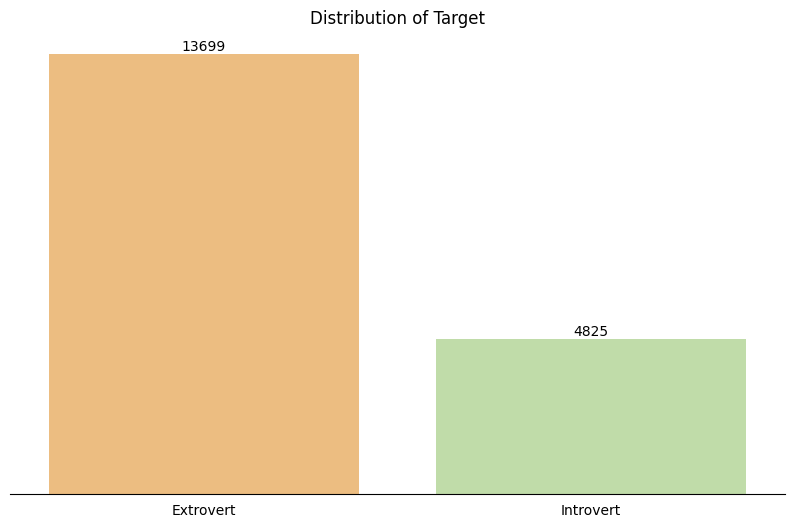

In [10]:
fig, ax = plt.subplots(figsize = (10,6))
sns.light_palette("seagreen", as_cmap = True)

ax = sns.countplot(
    data = df_train,
    x = 'Personality',
    palette = 'Spectral'
)
ax.set_title('Distribution of Target')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.tick_params(left = False, bottom = False)

ax.bar_label(ax.containers[0], 
             label_type = 'edge',
             color = 'black',
             fontsize = 10)

sns.despine(left = True, top = True)

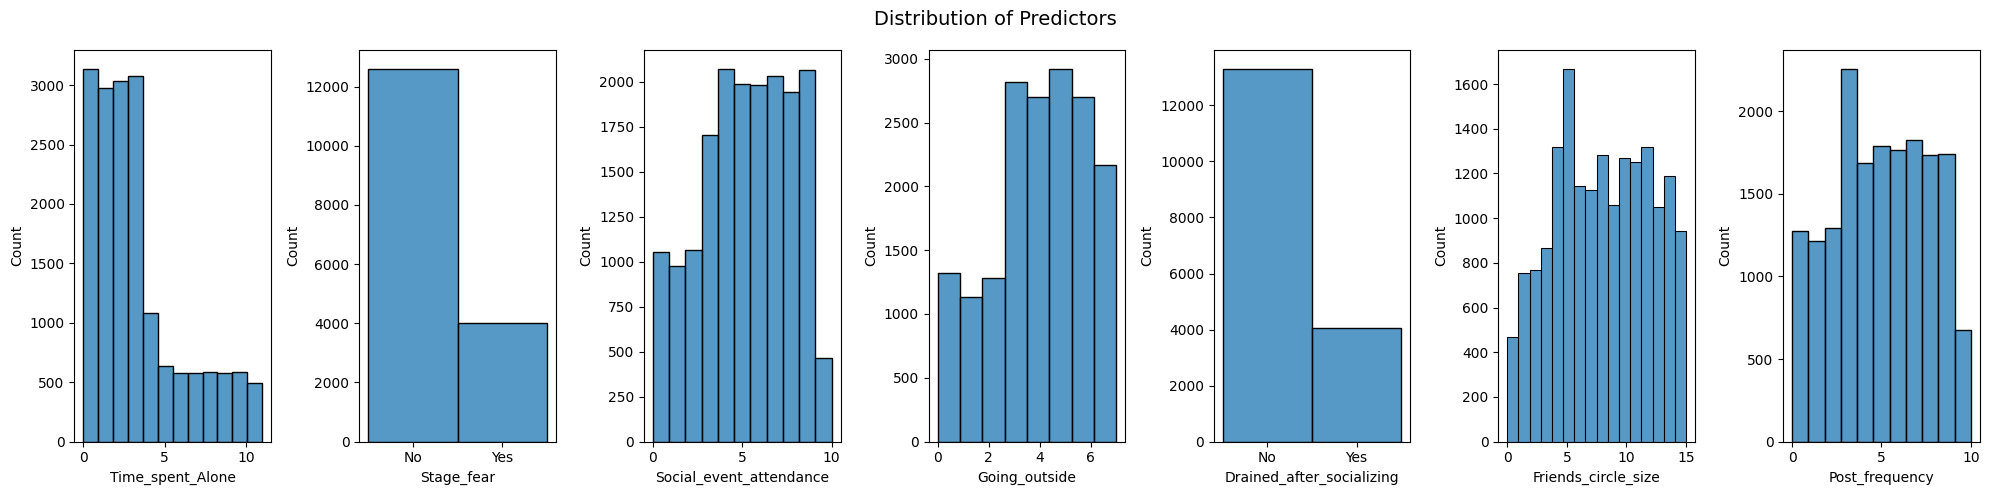

In [11]:
plot_columns = [col for col in df_train.columns if col != 'Personality']

fig, axes = plt.subplots(1, len(plot_columns), figsize=(20, 5))

for i, column in enumerate(plot_columns):
    sns.histplot(data=df_train, 
                 x=column, 
                 bins=df_train[column].nunique(), 
                 ax=axes[i])

fig.tight_layout(h_pad=2)
plt.subplots_adjust(top=0.9)
plt.suptitle('Distribution of Predictors', fontsize=14)
plt.show()

### Multivariate Analysis

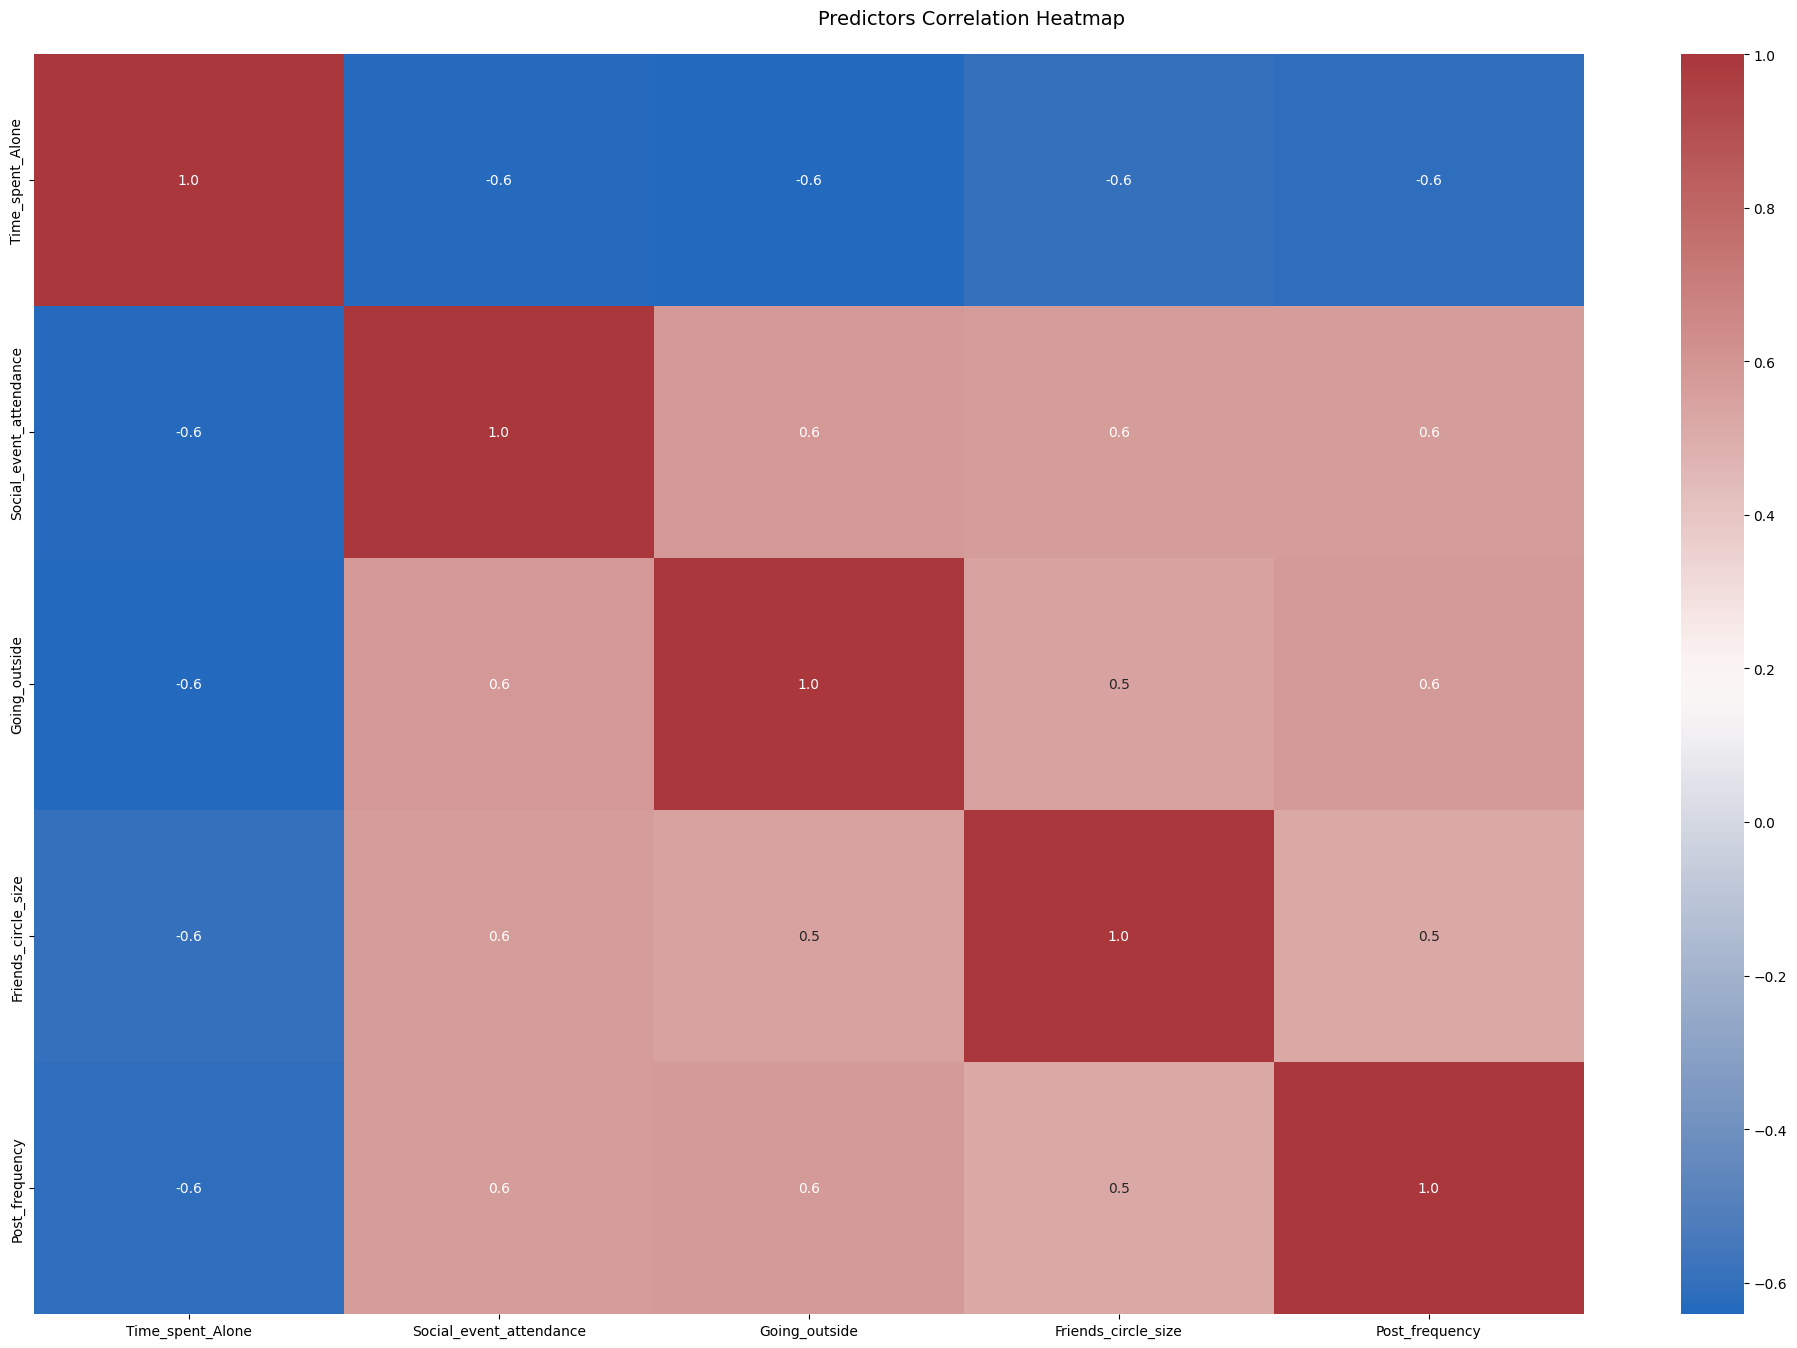

In [12]:
fig, ax = plt.subplots(figsize = (25,15))
df_features = df_train.select_dtypes(include='number')
corr = df_features.corr()
hm = sns.heatmap(corr,
                annot = True,
                ax = ax,
                cmap = sns.color_palette("vlag", as_cmap = True),
                fmt = '.1f')
fig.subplots_adjust(top = 0.95)
plt.suptitle('Predictors Correlation Heatmap', fontsize = 14)
plt.show()

# Preprocessing

### Train/Test Split

In [13]:
X = df_train.drop(columns = 'Personality', axis = 1)
y = df_train['Personality']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2 ,random_state = 42, stratify = y)

### Label Encoder

In [14]:
le = LabelEncoder()
# Convert the target variable 'Target' to numerical data
y_train = le.fit_transform(y_train)
y_valid = le.transform(y_valid)

In [15]:
num_cols = X.select_dtypes(include=['float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

In [16]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [17]:
# Define the preprocessing for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_valid_processed = preprocessor.transform(X_valid)
df_test_processed = preprocessor.transform(df_test)

# Convert processed arrays back to DataFrames (optional)
X_train_processed = pd.DataFrame(X_train_processed, columns=preprocessor.get_feature_names_out())
X_valid_processed = pd.DataFrame(X_valid_processed, columns=preprocessor.get_feature_names_out())
df_test_processed = pd.DataFrame(df_test_processed, columns=preprocessor.get_feature_names_out())

# Keep dataframe names consistent
X_train = X_train_processed
X_valid = X_valid_processed
df_test = df_test_processed

# Modeling & Hyperparameter Tuning

### Random Forest

In [18]:
#def objective(trial):
#    params = {
#        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
#        'max_depth': trial.suggest_int('max_depth', 5, 25),
#        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
#        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#        'max_features': trial.suggest_float('max_features', 0.1, 1.0),
#        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
#        'random_state': 42,
#    }
#
#    model = RandomForestClassifier(**params)
#
#    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy', n_jobs=-1)
#    return scores.mean()
#
## Run Optuna Optimization 
#print("Starting Optuna optimization...")
#study = optuna.create_study(direction='maximize', study_name='RandomForest_Optimization')
#study.optimize(objective, n_trials=50, show_progress_bar=True)
#
## Get and Print Best Parameters 
#best_params = study.best_params
#print("\nBest Hyperparameters found by Optuna:", best_params)
#print("Best cross-validation accuracy:", study.best_value)

Best Hyperparameters found by Optuna: {'n_estimators': 228, 'max_depth': 22, 'min_samples_split': 12, 'min_samples_leaf': 8, 'max_features': 0.48607326505610415, 'bootstrap': True}
Best cross-validation accuracy: 0.9680815528267435


In [19]:
# Create Random Forest Model
rf = RandomForestClassifier(
    n_estimators=228,
    max_depth=22,
    min_samples_split=12,
    min_samples_leaf=8,
    max_features=0.48607326505610415,
    bootstrap=True,
    random_state=42
)

# Perform cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Print CV scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Fit the model on the full training data
rf.fit(X_train, y_train)

# Predict on validation data
y_pred = rf.predict(X_valid)

# Calculate accuracy on validation data
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy on Validation Data:", accuracy)

Cross-Validation Scores: [0.97031039 0.97132254 0.96558704 0.96558704 0.96658792]
Mean CV Score: 0.9678789870389778
Accuracy on Validation Data: 0.9711201079622133


### XGBoost Classifier

In [20]:
#def objective_xgb(trial):
#    params = {
#        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#        'max_depth': trial.suggest_int('max_depth', 3, 15),
#        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#        'gamma': trial.suggest_float('gamma', 0, 5),
#        'random_state': 42,
#        'use_label_encoder': False,
#        'eval_metric': 'logloss'
#    }
#
#    model = XGBClassifier(**params)
#
#    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy', n_jobs=-1)
#    return scores.mean()
#
## Run Optuna Optimization 
#print("Starting Optuna optimization for XGBoost...")
#study_xgb = optuna.create_study(direction='maximize', study_name='XGBoost_Optimization')
#study_xgb.optimize(objective_xgb, n_trials=50, show_progress_bar=True)
#
## Output Best Parameters and Accuracy 
#best_params_xgb = study_xgb.best_params
#print("\nBest Hyperparameters found by Optuna for XGBoost:", best_params_xgb)
#print("Best cross-validation accuracy:", study_xgb.best_value)

Best Hyperparameters found by Optuna for XGBoost: {'n_estimators': 315, 'max_depth': 6, 'learning_rate': 0.02305077382703422, 'subsample': 0.522448234931572, 'colsample_bytree': 0.5010027521071047, 'gamma': 4.171405926582666}
Best cross-validation accuracy: 0.9682840047495358

In [21]:
# Create XGBoost model
xgb = XGBClassifier(
    n_estimators=315,
    max_depth=6,
    learning_rate=0.02305077382703422,
    subsample=0.522448234931572,
    colsample_bytree=0.5010027521071047,
    gamma=4.171405926582666,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
# Perform cross-validation
cv_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')

# Print CV scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean()) 

# Fit the model on the full training data
xgb.fit(X_train, y_train)

# Predict on validation data
y_pred = xgb.predict(X_valid)

# Calculate accuracy on validation data
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy on Validation Data:", accuracy)

Cross-Validation Scores: [0.97064777 0.97165992 0.96626181 0.96592443 0.96658792]
Mean CV Score: 0.9682163689553072
Accuracy on Validation Data: 0.9713900134952766


### CatBoost Classifier

In [22]:
#def objective_cat(trial):
#    params = {
#        'iterations': trial.suggest_int('iterations', 200, 1000),
#        'depth': trial.suggest_int('depth', 4, 10),
#        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
#        'random_state': 42,
#        'verbose': 0
#    }
#
#    model = CatBoostClassifier(**params)
#
#    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy', n_jobs=-1)
#    return scores.mean()
#
## Run Optuna Optimization 
#print("Starting Optuna optimization for CatBoost...")
#study_cat = optuna.create_study(direction='maximize', study_name='CatBoost_Optimization')
#study_cat.optimize(objective_cat, n_trials=50, show_progress_bar=True)
#
## Output Best Parameters and Accuracy 
#best_params_cat = study_cat.best_params
#print("\nBest Hyperparameters found by Optuna for CatBoost:", best_params_cat)
#print("Best cross-validation accuracy:", study_cat.best_value)

Best Hyperparameters found by Optuna for CatBoost: {'iterations': 866, 'depth': 5, 'learning_rate': 0.010027362875444333, 'l2_leaf_reg': 8.201786308362875}
Best cross-validation accuracy: 0.9682840275225304

In [23]:
# Create CatBoost model
catb = CatBoostClassifier(
    iterations=866,
    depth=5,
    learning_rate=0.010027362875444333,
    l2_leaf_reg=8.201786308362875,
    boosting_type='Plain',
    bootstrap_type='Bernoulli',
    random_state=42,
    verbose=0
)

# Perform cross-validation
cv_scores = cross_val_score(catb, X_train, y_train, cv=5, scoring='accuracy')

# Print CV scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())  

# Fit the model on the full training data
catb.fit(X_train, y_train)

# Predict on validation data
y_pred = catb.predict(X_valid)

# Calculate accuracy on validation data
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy on Validation Data:", accuracy)

Cross-Validation Scores: [0.97064777 0.97165992 0.96626181 0.96693657 0.96625042]
Mean CV Score: 0.968351298948844
Accuracy on Validation Data: 0.9713900134952766


# Importance Feature

### Random Forest

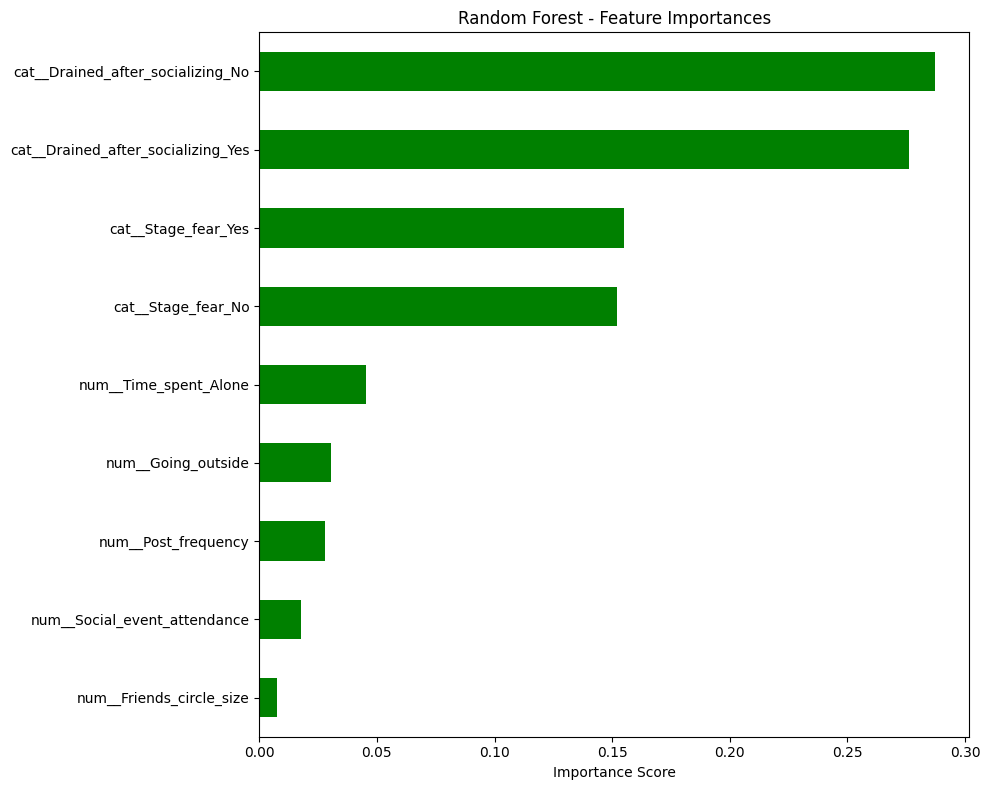

In [24]:
# Extract feature importances from the trained model
importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# Sort and plot
importances.sort_values(ascending=True).plot(kind="barh", color="g", figsize=(10, 8))
plt.title("Random Forest - Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

### XGBoost

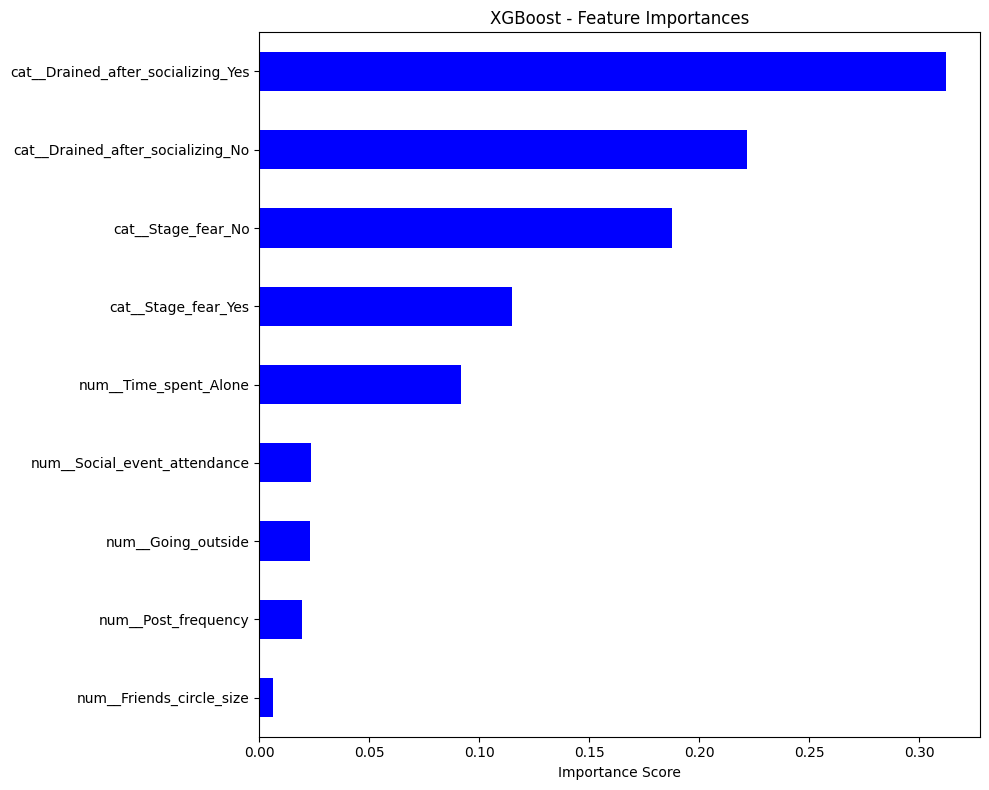

In [25]:
# Extract feature importances from the trained XGBoost model
importances_xgb = pd.Series(xgb.feature_importances_, index=X_train.columns)

# Sort and plot
importances_xgb.sort_values(ascending=True).plot(kind="barh", color="b", figsize=(10, 8))
plt.title("XGBoost - Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

### CatBoost

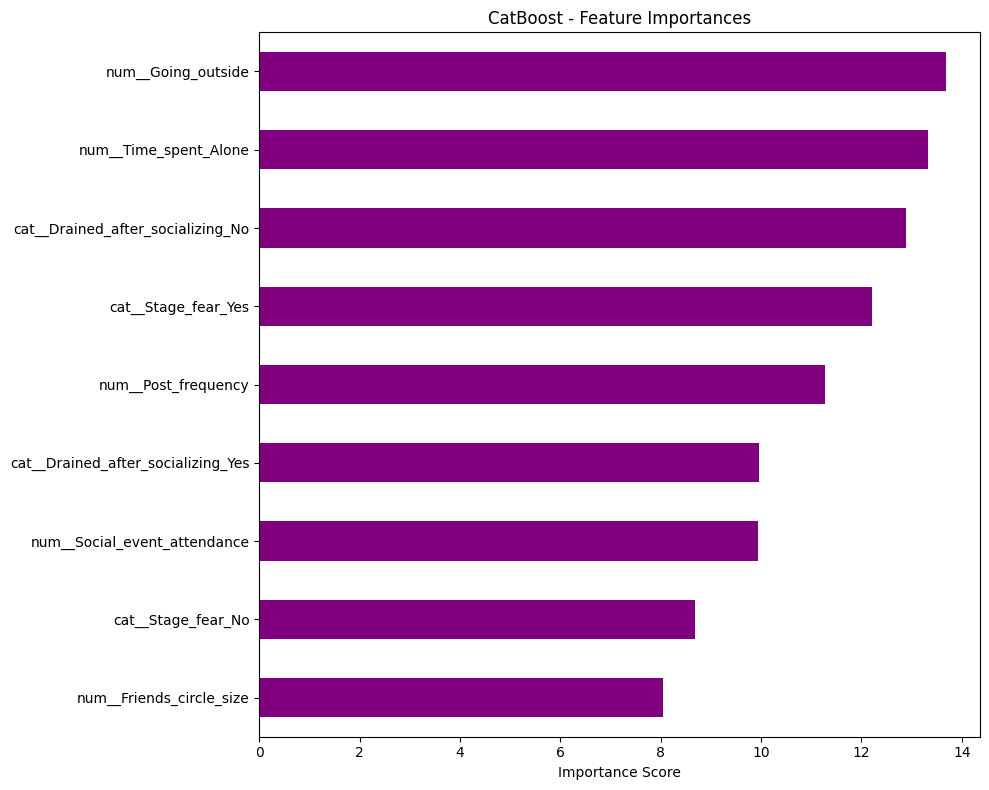

In [26]:
# Extract feature importances from the trained CatBoost model
importances_catb = pd.Series(catb.get_feature_importance(), index=X_train.columns)

# Sort and plot
importances_catb.sort_values(ascending=True).plot(kind="barh", color="purple", figsize=(10, 8))
plt.title("CatBoost - Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# Ensemble Models

### Hard Voting

In [27]:
# Predict class labels
rf_pred = rf.predict(X_valid)
xgb_pred = xgb.predict(X_valid)
catb_pred = catb.predict(X_valid)

# Combine into DataFrame
ensemble_preds = pd.DataFrame({
    'RF': rf_pred,
    'XGBoost': xgb_pred,
    'CatBoost': catb_pred
})

# Majority Voting
majority_vote = ensemble_preds.mode(axis=1).iloc[:, 0]

# Evaluate
print(f"Majority Voting Accuracy: {accuracy_score(y_valid, majority_vote):.5f}")

Majority Voting Accuracy: 0.97139


### Soft Voting

In [28]:
# Predict probabilities
rf_probs = rf.predict_proba(X_valid)
xgb_probs = xgb.predict_proba(X_valid)
catb_probs = catb.predict_proba(X_valid)

# Average probabilities
soft_vote_probs = (rf_probs + xgb_probs + catb_probs) / 3
soft_vote = soft_vote_probs.argmax(axis=1)

# Evaluate
print(f"Soft Voting Accuracy: {accuracy_score(y_valid, soft_vote):.5f}")

Soft Voting Accuracy: 0.97112


# Submission

In [29]:
# Predict on test set
rf_test_pred = rf.predict(df_test)
xgb_test_pred = xgb.predict(df_test)
catb_test_pred = catb.predict(df_test)

# Ensemble
ensemble_test = pd.DataFrame({
    'RF': rf_test_pred,
    'XGBoost': xgb_test_pred,
    'CatBoost': catb_test_pred
})
final_test_pred = ensemble_test.mode(axis=1).iloc[:, 0]

# Inverse label encoding
final_test_pred = le.inverse_transform(final_test_pred)

# Generate submission file
sample_submission_df = pd.read_csv('/kaggle/input/dataset/sample_submission.csv')
submission = pd.DataFrame({
    'id': sample_submission_df['id'],
    'Target': final_test_pred
})
submission.to_csv('submission.csv', index=False)
submission.head()


,id,Target
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
